In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf



In [41]:
# This function makes use of the Ticker() module in the Yfinance package to individual objects which represent the companies being analysed and the market (S&P 500)
def getStocks():
    global Amazon 
    Amazon = yf.Ticker('AMZN')
    global consEG 
    consEG = yf.Ticker('CEG')
    global FleetCor 
    FleetCor = yf.Ticker('FLT')
    global Google 
    Google = yf.Ticker('GOOG')
    global Halliburton 
    Halliburton = yf.Ticker('HAL')
    global johnsonCI 
    johnsonCI = yf.Ticker('JCI')
    global Meta 
    Meta = yf.Ticker('META')
    global Match 
    Match = yf.Ticker('MTCH')
    global tMobile 
    tMobile = yf.Ticker('TMUS')
    global unitedRent 
    unitedRent = yf.Ticker('URI')
    global SandP
    SandP = yf.Ticker('SPY')
    
getStocks()


In [79]:
# This function is built on the previous function to obtain the data of the year-to-date data on these stocks and the market (S&P 500)
def getData():
    global amazonData
    amazonData = Amazon.history(period = 'ytd', interval = '1d').reset_index()
    global consegData
    consegData = consEG.history(period = 'ytd', interval = '1d').reset_index()
    global fltData
    fltData = FleetCor.history(period = 'ytd', interval = '1d').reset_index()
    global googleData
    googleData = Google.history(period = 'ytd', interval = '1d').reset_index()
    global halliBurtData
    halliBurtData = Amazon.history(period = 'ytd', interval = '1d').reset_index()
    global johnsonData
    johnsonData = johnsonCI.history(period = 'ytd', interval = '1d').reset_index()
    global metaData
    metaData = Meta.history(period = 'ytd', interval = '1d').reset_index()
    global matchData
    matchData = Match.history(period = 'ytd', interval = '1d').reset_index()
    global tMobData
    tMobData = tMobile.history(period = 'ytd', interval = '1d').reset_index()
    global uniRenData
    uniRenData = unitedRent.history(period = 'ytd', interval = '1d').reset_index()
    global SandPData
    SandPData = SandP.history(period = 'ytd', interval = '1d').reset_index()

getData()


In [98]:
global marketTrend 
marketTrend = SandPData[['Date','Close']].rename(columns = {'Close':'S&P'})
marketTrend

,Date,S&P
0,2022-01-03,472.242310
1,2022-01-04,472.084137
2,2022-01-05,463.019104
3,2022-01-06,462.584137
4,2022-01-07,460.755310
...,...,...
187,2022-09-30,357.179993
188,2022-10-03,366.609985
189,2022-10-04,377.970001
190,2022-10-05,377.089996


<AxesSubplot:xlabel='Date', ylabel='S&P'>

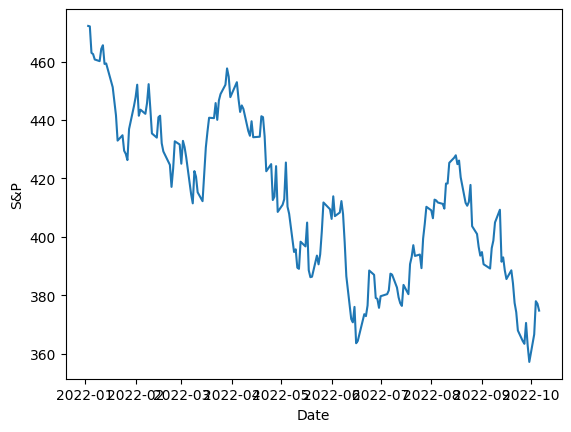

In [99]:
sns.lineplot(x = 'Date', y = 'S&P', data = marketTrend)

In [103]:
def growthStocks():
    global amazonTrend 
    amazonTrend = amazonData[['Close']].rename(columns = {'Close':'Amazon'})
    global consegTrend 
    consegTrend = consegData[['Close']].rename(columns = {'Close':'Constellation Energy'})
    global fltTrend 
    fltTrend = fltData[['Close']].rename(columns = {'Close':'FleetCor Tech'})
    global googleTrend 
    googleTrend = googleData[['Close']].rename(columns = {'Close':'Google'})
    global halliBurtTrend 
    halliBurtTrend = halliBurtData[['Close']].rename(columns = {'Close':'Halliburton'})
    global johnsonTrend 
    johnsonTrend = johnsonData[['Close']].rename(columns = {'Close':'Johnson Control International'})
    global metaTrend 
    metaTrend = metaData[['Close']].rename(columns = {'Close':'Meta'})
    global matchTrend 
    matchTrend = matchData[['Close']].rename(columns = {'Close':'Match'})
    global tMobTrend 
    tMobTrend = tMobData[['Close']].rename(columns = {'Close':'T-Mobile'})
    global uniRenTrend 
    uniRenTrend = uniRenData[['Close']].rename(columns = {'Close':'United Rentals'})
    
growthStocks()

In [219]:
data = yf.download(" SPY AMZN CEG FLT GOOG HAL JCI META MTCH TMUS URI",period = 'ytd').reset_index()

frames = (data['Date'],data['Close'])
growthStockTrend = pd.concat(frames, axis = 1)

growthStockTrend

[*********************100%***********************]  11 of 11 completed


,Date,AMZN,CEG,FLT,GOOG,HAL,JCI,META,MTCH,SPY,TMUS,URI
0,2022-01-03,170.404495,NaN,231.110001,145.074493,23.990000,79.349998,338.540009,134.229996,477.709991,114.430000,330.640015
1,2022-01-04,167.522003,NaN,237.250000,144.416504,25.430000,80.339996,336.529999,132.970001,477.549988,114.059998,347.089996
2,2022-01-05,164.356995,NaN,237.300003,137.653503,25.180000,79.029999,324.170013,125.519997,468.380005,115.360001,335.019989
3,2022-01-06,163.253998,NaN,239.259995,137.550995,25.610001,80.379997,332.459991,126.059998,467.940002,115.570000,335.170013
4,2022-01-07,162.554001,NaN,243.029999,137.004501,26.020000,79.269997,331.790009,125.269997,466.089996,109.739998,325.980011
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-09-30,113.000000,83.190002,176.169998,96.150002,24.620001,49.220001,135.679993,47.750000,357.179993,134.169998,270.119995
188,2022-10-03,115.879997,86.589996,182.300003,99.300003,26.379999,51.509998,138.610001,50.279999,366.609985,138.899994,281.609985
189,2022-10-04,121.089996,89.339996,188.429993,102.410004,28.120001,53.549999,140.279999,51.450001,377.970001,142.539993,294.260010
190,2022-10-05,120.949997,88.169998,187.050003,102.220001,29.240000,53.340000,138.979996,51.040001,377.089996,141.229996,293.880005
